# Portfolio Analysis with Python

A collection of tools and code i've learnt over my coursera course.

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# yfinance a module which imports data from Yahoo Finance.
import yfinance as yf
from scipy.stats import norm
from scipy.optimize import minimize
import os
np.set_printoptions(suppress=True)
#plt.style.use("seaborn-dark-palette")

plt.rcParams['figure.figsize'] = (20.00, 10.00)

In [2]:
data_filepath = os.getcwd()

## Functions

### Importing 

In [31]:
def getstockdata(ticker,interval,period):
    """
    Grabs various stock attributes into a dataframe specified by ticker, inverval and year.
    ticker: Yahoo Finance Ticker

    """
    ticker = yf.Ticker(ticker)
    ticker_history = ticker.history(interval=interval,period=period)
    
    return ticker_history

# Importing Data

In [38]:
# create list of tickers
data = yf.download(

    tickers = ["AAPL", "^GSPC", "^AXJO" ],
    
    period = "10Y",

    interval = "1D",
    
    group_by = 'ticker',
    
)
data.head()

[*********************100%***********************]  3 of 3 completed


^GSPC                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2010-11-26  1194.160034  1194.160034  1186.930054  1189.400024  1189.400024   
2010-11-29  1189.079956  1190.339966  1173.640015  1187.760010  1187.760010   
2010-11-30  1182.959961  1187.400024  1174.140015  1180.550049  1180.550049   
2010-12-01  1186.599976  1207.609985  1186.599976  1206.069946  1206.069946   
2010-12-02  1206.810059  1221.890015  1206.810059  1221.530029  1221.530029   

                                ^AXJO                                         \
                  Volume         Open         High          Low        Close   
Date                                                                           
2010-11-26  1.613820e+09  4599.100098  4616.500000  4594.000000  4598.299805   
2010-11-29  3.673450e+09  4594.299805  4623.500000  4557.299805  4618.500000   
2010-11-30  4.284700e+09  4616.399902  4616.399902  4584.299805  4584.399902   
2010-12-01  4.548110e+09  4581.399902  4586.799805  4557.000000  4586.600098   
2010-12-02  4.970800e+09  4604.700195  4686.000000  4604.100098  4676.200195   

                                     AAPL                                   \
              Adj Close Volume       Open       High        Low      Close   
Date                                                                         
2010-11-26  4598.299805    0.0  11.205000  11.346429  11.176429  11.250000   
2010-11-29  4618.500000    0.0  11.267858  11.338572  11.120714  11.316786   
2010-11-30  4584.399902    0.0  11.197857  11.227143  11.102500  11.112500   
2010-12-01  4586.600098    0.0  11.259643  11.348214  11.250000  11.300000   
2010-12-02  4676.200195    0.0  11.340357  11.392858  11.246072  11.362500   

                                   
           Adj Close       Volume  
Date                               
2010-11-26  9.626012  237585600.0  
2010-11-29  9.683158  445785200.0  
2010-11-30  9.508361  501858000.0  
2010-12-01  9.668793  461750800.0  
2010-12-02  9.722270  462837200.0

In [39]:
appl_ret = returns(data.AAPL)
appl_ret

Return
Date                
2010-11-29  1.005937
2010-11-30  0.981948
2010-12-01  1.016873
2010-12-02  1.005531
2010-12-03  0.997768
...              ...
2020-11-20  0.989042
2020-11-23  0.970257
2020-11-24  1.011594
2020-11-25  1.007467
2020-11-26  1.000000

[2579 rows x 1 columns]

# Returns and Distributions

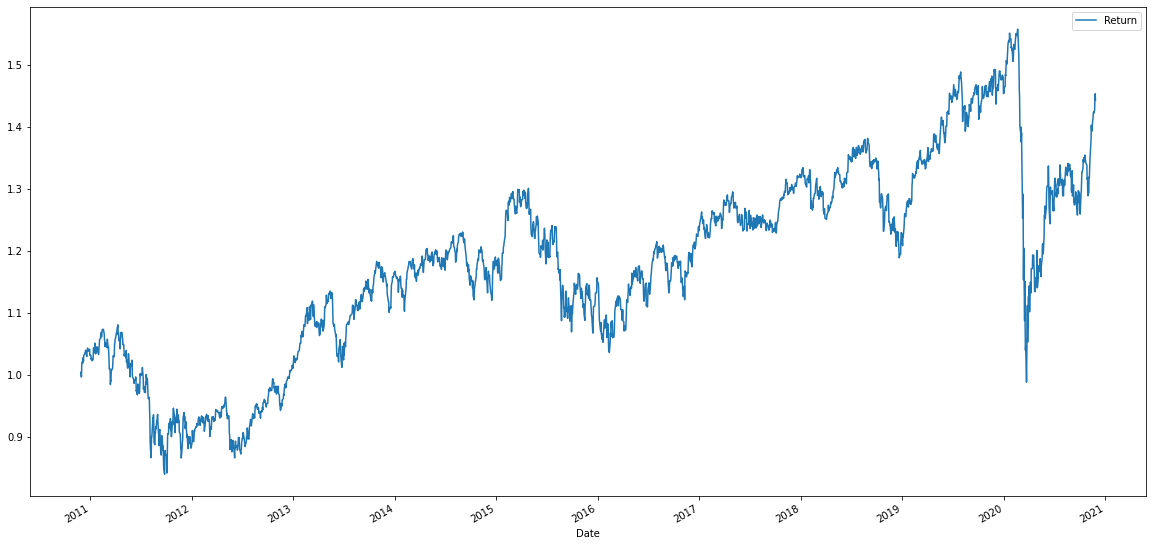

In [40]:
plotreturns(data["^AXJO"])

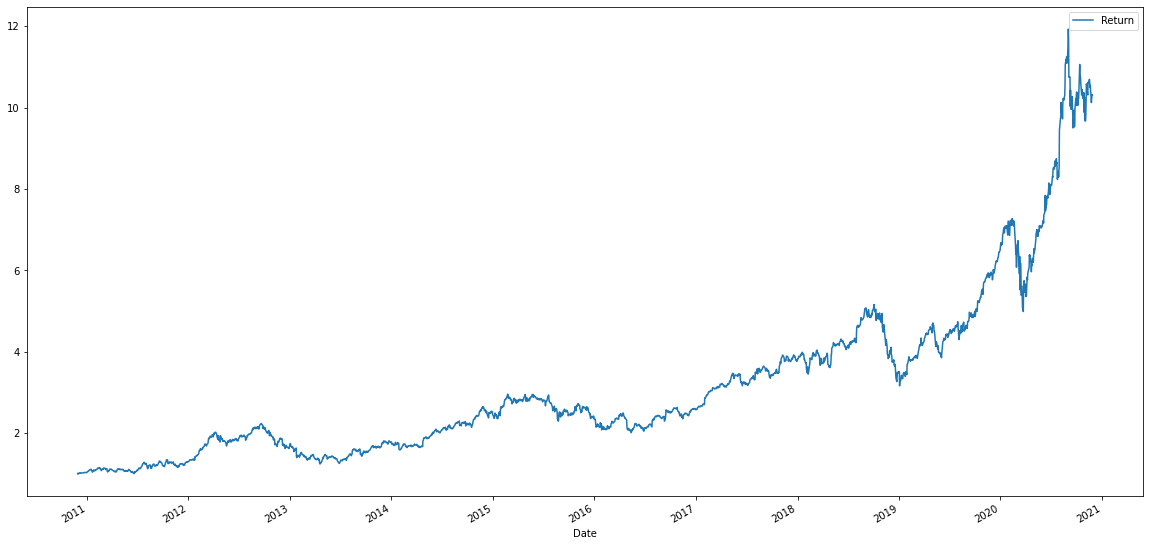

In [41]:
plotreturns(data.AAPL)

<AxesSubplot:ylabel='Count'>

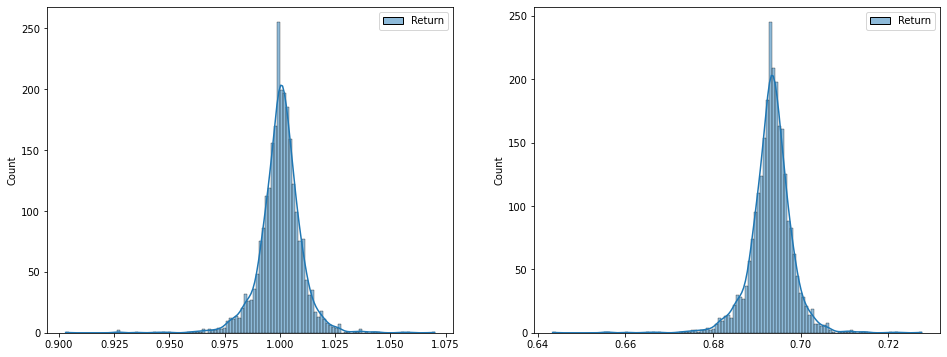

In [42]:
fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(returns(data["^AXJO"]),kde=True)
plt.subplot(1,2,2)
sns.histplot(np.log1p(returns(data["^AXJO"])),kde=True)

# Drawdown Plots

This function is used to return a pandas series which has the drawdown for a certain range of returns.

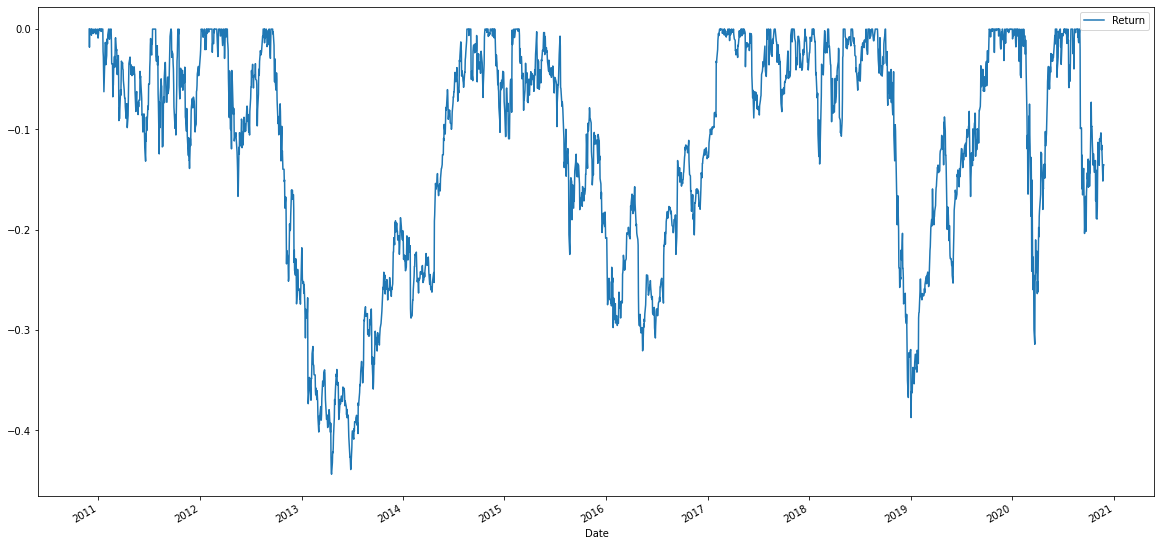

In [43]:
plotdrawdown(data.AAPL)

# Hedge Fund Indicies

In [45]:
# import data

hedge_fund = pd.read_csv(os.path.join(data_filepath,"edhec-hedgefundindices.csv"),parse_dates=True,index_col=0) / 100
hedge_fund.head()

Convertible Arbitrage  CTA Global  Distressed Securities  \
date                                                                   
1997-01-31                 0.0119      0.0393                 0.0178   
1997-02-28                 0.0123      0.0298                 0.0122   
1997-03-31                 0.0078     -0.0021                -0.0012   
1997-04-30                 0.0086     -0.0170                 0.0030   
1997-05-31                 0.0156     -0.0015                 0.0233   

            Emerging Markets  Equity Market Neutral  Event Driven  \
date                                                                
1997-01-31            0.0791                 0.0189        0.0213   
1997-02-28            0.0525                 0.0101        0.0084   
1997-03-31           -0.0120                 0.0016       -0.0023   
1997-04-30            0.0119                 0.0119       -0.0005   
1997-05-31            0.0315                 0.0189        0.0346   

            Fixed Income Arbitrage  Global Macro  Long/Short Equity  \
date                                                                  
1997-01-31                  0.0191        0.0573             0.0281   
1997-02-28                  0.0122        0.0175            -0.0006   
1997-03-31                  0.0109       -0.0119            -0.0084   
1997-04-30                  0.0130        0.0172             0.0084   
1997-05-31                  0.0118        0.0108             0.0394   

            Merger Arbitrage  Relative Value  Short Selling  Funds Of Funds  
date                                                                         
1997-01-31            0.0150          0.0180        -0.0166          0.0317  
1997-02-28            0.0034          0.0118         0.0426          0.0106  
1997-03-31            0.0060          0.0010         0.0778         -0.0077  
1997-04-30           -0.0001          0.0122        -0.0129          0.0009  
1997-05-31            0.0197          0.0173        -0.0737          0.0275

In [46]:
# Grab relevant securities

distressed_securities_returns = hedge_fund["Distressed Securities"]["2000"::]
distressed_securities_returns

date
2000-01-31    0.0088
2000-02-29    0.0421
2000-03-31    0.0103
2000-04-30   -0.0101
2000-05-31   -0.0132
               ...  
2018-07-31    0.0093
2018-08-31    0.0002
2018-09-30    0.0050
2018-10-31   -0.0158
2018-11-30   -0.0193
Name: Distressed Securities, Length: 227, dtype: float64

In [47]:
# monthly gaussian VaR 

gaussianVaR(distressed_securities_returns,level=0.01,modified=False) * 100

3.1430176939280456

In [48]:
# monthly modified gaussian VaR

gaussianVaR(distressed_securities_returns,level=0.01,modified=True) * 100

4.966909110627921

In [49]:
#historical monthly VaR

historicVaR(hedge_fund["Distressed Securities"]["2000"::],level=1) * 100

4.2642

# Ken French Dataset 

In [52]:
# import Ken French Industry Portfolio Data
ken_french = pd.read_csv(os.path.join(data_filepath,"ind30_m_vw_rets.csv"),header=0,parse_dates=True,index_col=0) / 100
ken_french.index = pd.to_datetime(ken_french.index,format="%Y%m").to_period("M")
ken_french.head()

Food    Beer    Smoke   Games   Books   Hshld   Clths   Hlth   \
1926-07  0.0056 -0.0519  0.0129  0.0293  0.1097 -0.0048  0.0808  0.0177   
1926-08  0.0259  0.2703  0.0650  0.0055  0.1001 -0.0358 -0.0251  0.0425   
1926-09  0.0116  0.0402  0.0126  0.0658 -0.0099  0.0073 -0.0051  0.0069   
1926-10 -0.0306 -0.0331  0.0106 -0.0476  0.0947 -0.0468  0.0012 -0.0057   
1926-11  0.0635  0.0729  0.0455  0.0166 -0.0580 -0.0054  0.0187  0.0542   

          Chems   Txtls  ...   Telcm   Servs   BusEq   Paper   Trans   Whlsl  \
1926-07  0.0814  0.0039  ...  0.0083  0.0922  0.0206  0.0770  0.0193 -0.2379   
1926-08  0.0550  0.0814  ...  0.0217  0.0202  0.0439 -0.0238  0.0488  0.0539   
1926-09  0.0533  0.0231  ...  0.0241  0.0225  0.0019 -0.0554  0.0005 -0.0787   
1926-10 -0.0476  0.0100  ... -0.0011 -0.0200 -0.0109 -0.0508 -0.0264 -0.1538   
1926-11  0.0520  0.0311  ...  0.0163  0.0377  0.0364  0.0384  0.0160  0.0467   

          Rtail   Meals   Fin     Other  
1926-07  0.0007  0.0187  0.0037  0.0520  
1926-08 -0.0075 -0.0013  0.0446  0.0676  
1926-09  0.0025 -0.0056 -0.0123 -0.0386  
1926-10 -0.0220 -0.0411 -0.0516 -0.0849  
1926-11  0.0652  0.0433  0.0224  0.0400  

[5 rows x 30 columns]

In [53]:
# import number of stocks in the index

ind_n = pd.read_csv(os.path.join(data_filepath, "ind30_m_nfirms.csv"),index_col=0,parse_dates=True,header=0)
ind_n.index = pd.to_datetime(ind_n.index,format="%Y%m").to_period("M")
ind_n.head()

Food   Beer   Smoke  Games  Books  Hshld  Clths  Hlth   Chems  Txtls  \
1926-07     43      3     16      7      2      8     12      7     17     13   
1926-08     43      3     16      7      2      8     12      7     17     13   
1926-09     43      3     16      7      2      8     12      7     17     13   
1926-10     43      3     16      7      2      8     12      7     17     13   
1926-11     43      3     16      7      2      8     12      7     17     13   

         ...  Telcm  Servs  BusEq  Paper  Trans  Whlsl  Rtail  Meals  Fin    \
1926-07  ...      5      3      7      6     74      2     33      6     12   
1926-08  ...      5      3      7      6     74      2     33      6     12   
1926-09  ...      5      3      7      6     74      2     33      6     12   
1926-10  ...      5      3      7      6     74      2     33      6     12   
1926-11  ...      5      3      7      6     74      2     33      6     12   

         Other  
1926-07      4  
1926-08      4  
1926-09      4  
1926-10      4  
1926-11      4  

[5 rows x 30 columns]

In [54]:
# import index sizes

ind_size = pd.read_csv(os.path.join(data_filepath, "ind30_m_size.csv"),index_col=0,parse_dates=True,header=0)

# format dates

ind_size.index = pd.to_datetime(ind_size.index,format="%Y%m").to_period("M")
ind_size.head()

Food   Beer   Smoke  Games  Books  Hshld  Clths  Hlth   Chems  Txtls  \
1926-07  35.98   7.12  59.72  26.41  12.02  22.27  18.36  25.52  57.59   6.18   
1926-08  36.10   6.75  60.47  27.17  13.33  22.13  19.83  25.80  62.13   6.20   
1926-09  37.00   8.58  64.03  27.30  14.67  21.18  19.29  26.73  65.53   6.71   
1926-10  37.14   8.92  64.42  28.76  14.42  21.23  19.03  26.87  68.47   6.82   
1926-11  35.88   8.62  65.08  27.38  15.79  20.14  19.03  26.54  65.06   6.84   

         ...   Telcm  Servs  BusEq  Paper  Trans  Whlsl  Rtail  Meals  Fin    \
1926-07  ...  350.36  13.60  56.70  35.35  66.91   1.19  46.65  10.82  18.83   
1926-08  ...  353.27  14.75  57.74  37.86  67.99   0.90  46.57  11.00  18.88   
1926-09  ...  360.96  15.05  59.61  36.82  71.02   0.95  46.11  10.94  19.67   
1926-10  ...  364.16  15.30  59.52  34.77  70.83   0.88  46.15  10.80  19.36   
1926-11  ...  363.74  14.89  58.74  32.80  68.75   0.74  45.03  10.33  18.35   

         Other  
1926-07  24.25  
1926-08  25.51  
1926-09  27.21  
1926-10  26.16  
1926-11  23.94  

[5 rows x 30 columns]

In [55]:
ken_french.columns

# Get rid of the space

ken_french.columns = ken_french.columns.str.strip()
ken_french.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [56]:
gaussianVaR(ken_french[["Chems","Rtail"]],modified=True)

Chems    0.079262
Rtail    0.080437
dtype: float64

## Gaussian and Return Plots

<AxesSubplot:>

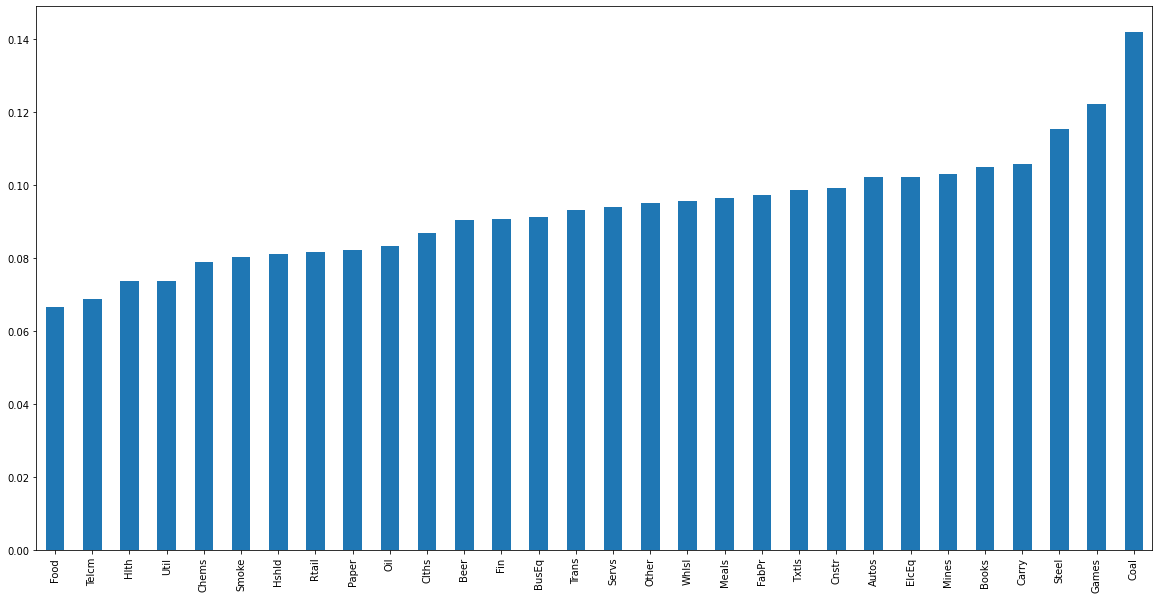

In [57]:
#historical var bar plot

historicVaR(ken_french).sort_values().plot.bar()

<AxesSubplot:>

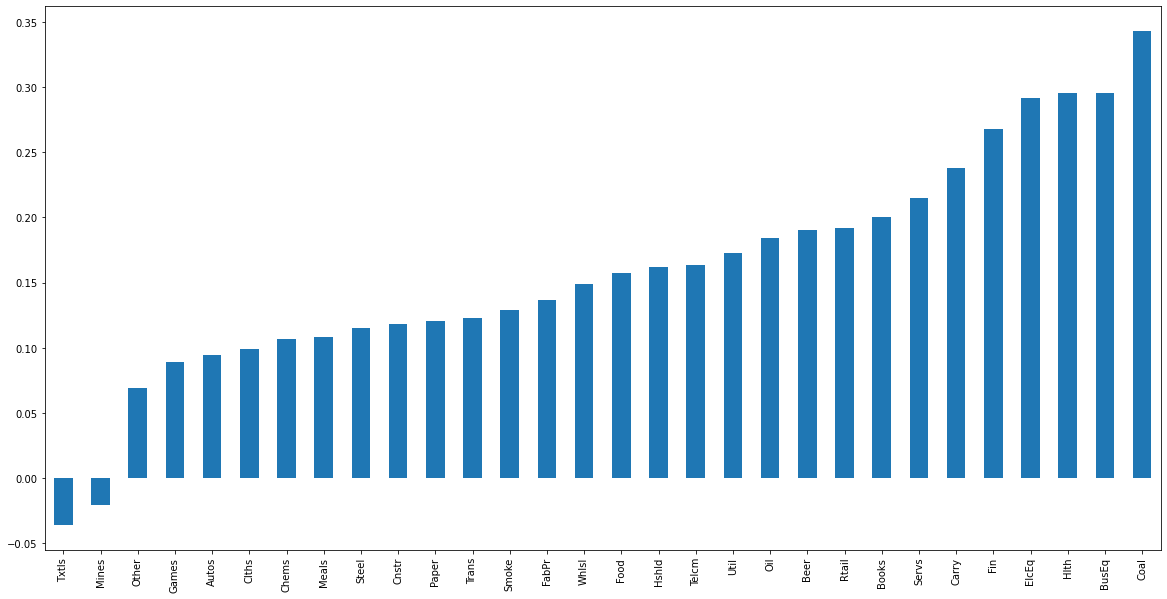

In [58]:
# returns from 1995-2000

annual_return(ken_french["1995":"2000"],12).sort_values().plot.bar()

# Quiz Two 

In [59]:
# import data

columns = ["Steel","Books","Oil","Mines"]
ken_frenchq2 = ken_french["2013":"2017"][columns]
ken_frenchq2.head()

Steel   Books     Oil   Mines
2013-01  0.0428  0.0513  0.0788  0.0059
2013-02 -0.0268 -0.0654  0.0052 -0.0756
2013-03  0.0210  0.0778  0.0209  0.0091
2013-04 -0.0441 -0.0029 -0.0129 -0.1057
2013-05  0.0384  0.0479  0.0307  0.0022

In [60]:
# compute returns

r = annual_return(ken_frenchq2,12)
r

Steel    0.100716
Books    0.095312
Oil      0.025275
Mines    0.005136
dtype: float64

In [61]:
# Check if my function returns same value.

def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

annualize_rets(ken_frenchq2,12)

Steel    0.100716
Books    0.095312
Oil      0.025275
Mines    0.005136
dtype: float64

In [62]:
# Create Variance-Covariance Matrix

cov = ken_frenchq2.cov()
cov

Steel     Books       Oil     Mines
Steel  0.004391  0.001940  0.002122  0.003391
Books  0.001940  0.002720  0.001637  0.001539
Oil    0.002122  0.001637  0.002697  0.002179
Mines  0.003391  0.001539  0.002179  0.005232

Expected retuns are equal to the annualised returns.

In [63]:
# Run optimiser 

weights = msr(0.1,r,cov)
weights

array([1., 0., 0., 0.])

In [64]:
# Series for MSR portfolio Weights

pd.Series(weights,index=columns).round(4)

Steel    1.0
Books    0.0
Oil      0.0
Mines    0.0
dtype: float64

In [65]:
# Series for GMV portfolio weights

pd.Series(gmv(cov).round(4)*100,index=columns)

Steel     0.00
Books    47.70
Oil      43.41
Mines     8.89
dtype: float64

## Markowitz Bullet

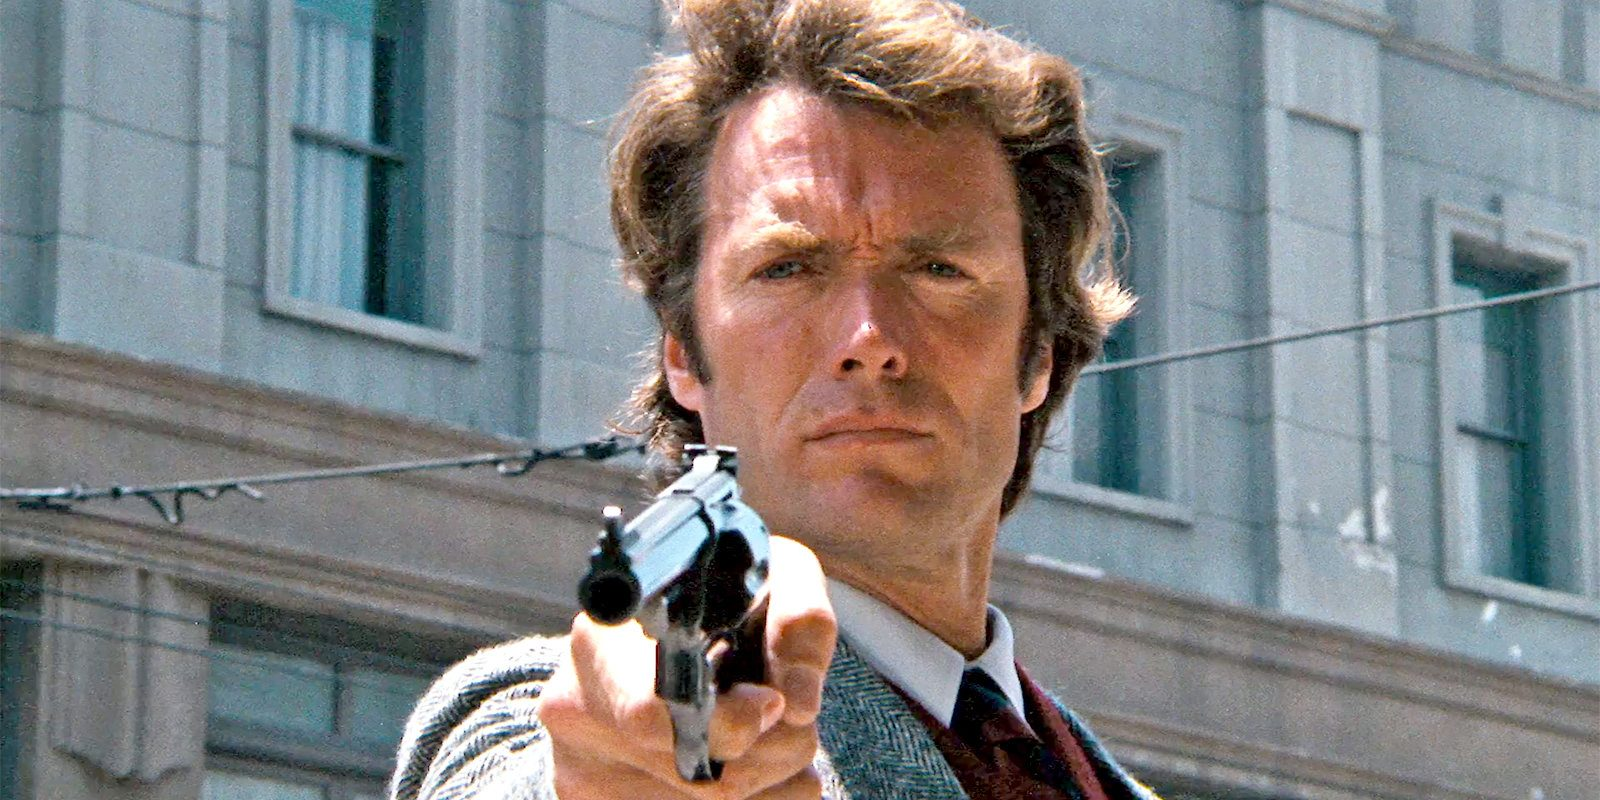

In [5]:
tickers = ["AAPL","TSLA","AMZN","GOOG"]
stocks = yf.Tickers(tickers=tickers)

yfinance.Tickers object <AAPL,TSLA,AMZN,GOOG>

In [6]:
stocks_data = stocks.history(start="2000-01-01",end="2020-11-24")

[*********************100%***********************]  4 of 4 completed


In [7]:
stocks_data.head()

Close                    Dividends                     High  \
                AAPL     AMZN GOOG TSLA      AAPL AMZN GOOG TSLA      AAPL   
Date                                                                         
1999-12-31  0.785456  76.1250  NaN  NaN       0.0    0  NaN  NaN  0.785933   
2000-01-03  0.855168  89.3750  NaN  NaN       0.0    0  NaN  NaN  0.859465   
2000-01-04  0.783068  81.9375  NaN  NaN       0.0    0  NaN  NaN  0.845141   
2000-01-05  0.794528  69.7500  NaN  NaN       0.0    0  NaN  NaN  0.844663   
2000-01-06  0.725771  65.5625  NaN  NaN       0.0    0  NaN  NaN  0.817447   

                     ... Open      Stock Splits                    Volume  \
               AMZN  ... GOOG TSLA         AAPL AMZN GOOG TSLA       AAPL   
Date                 ...                                                    
1999-12-31  79.3750  ...  NaN  NaN          0.0    0  NaN  NaN  163811200   
2000-01-03  89.5625  ...  NaN  NaN          0.0    0  NaN  NaN  535796800   
2000-01-04  91.5000  ...  NaN  NaN          0.0    0  NaN  NaN  512377600   
2000-01-05  75.1250  ...  NaN  NaN          0.0    0  NaN  NaN  778321600   
2000-01-06  72.6875  ...  NaN  NaN          0.0    0  NaN  NaN  767972800   

                                
                AMZN GOOG TSLA  
Date                            
1999-12-31   7270700  NaN  NaN  
2000-01-03  16117600  NaN  NaN  
2000-01-04  17487400  NaN  NaN  
2000-01-05  38457400  NaN  NaN  
2000-01-06  18752000  NaN  NaN  

[5 rows x 28 columns]

In [72]:
# grab the closing price columns for each stock. Save in list

columns = [x for x in stocks_data.columns if "Close" in x]
stock_close = np.log1p(1+ stocks_data[columns].dropna().pct_change())
stock_close.head().dropna()

Close                              
                AAPL      AMZN      GOOG      TSLA
Date                                              
2010-06-30  0.684049  0.696135  0.682847  0.691891
2010-07-01  0.687066  0.700897  0.686993  0.653120
2010-07-02  0.690044  0.684912  0.689797  0.628244
2010-07-06  0.696563  0.697353  0.692597  0.609256

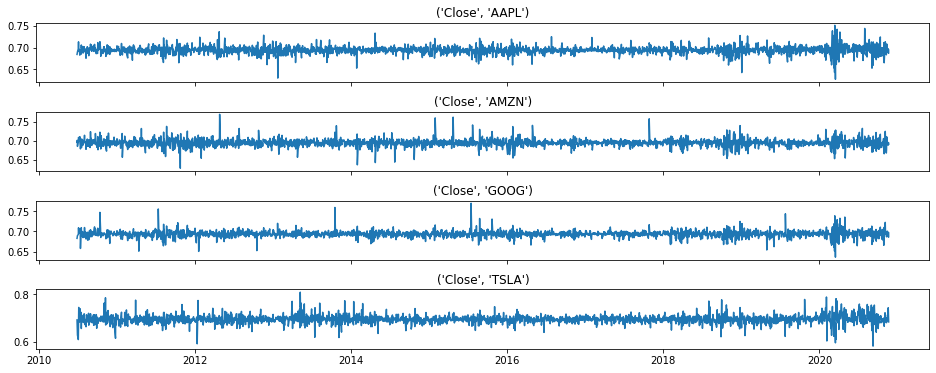

In [70]:
fig, ax = plt.subplots(nrows=4,ncols=1,sharex=True,figsize=(16,6))

for col, axes in zip(stock_close.columns, ax.flatten()):
    axes.plot(stock_close.index,stock_close[col])
    axes.set_title(col)
    plt.subplots_adjust(wspace=.5, hspace=.5)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

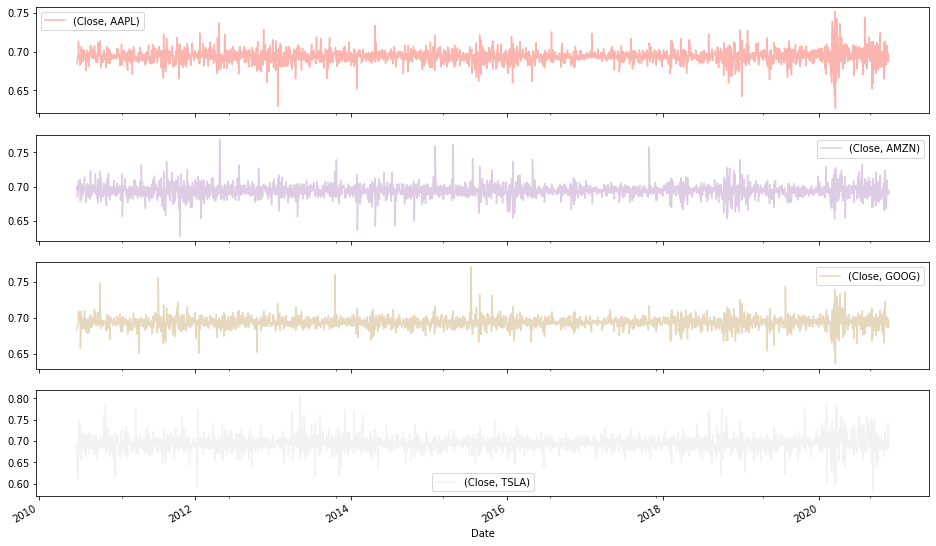

In [71]:
stock_close.plot(subplots=True,figsize=(16,10),colormap='Pastel1')

## Initiliase For Loop for Portfolios

In [82]:
np.random.seed(50)
n_portfolios = 6000
all_weights = np.zeros((n_portfolios,len(stock_close.columns)))
ret_arr = np.zeros(n_portfolios)
vol_arr = np.zeroes(n_portfolios)

for x in range(n_portfolios):
    
    weights = 
    